# Homework 1 (Linear Regression)

# COSC 3337 -  Dr. Rizk
## _Minh Nguyen - 2069407_

### __About The Data__

The data we'll be using comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality), and contains the following attributes about red wine:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dixoide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol (%)
- quality

We adjusted the dependent variable, 'quality', to make it a little more continuous.

### __Problem Statement__

Let's say we are part of a data science team that is contracted out as consultants for different companies. In this scenario, we have been assigned a contract with a red wine company which makes a special Cougar Red Blend wine. They have a number of different varieties, each given different quality scores. The wine company has collected different characteristics about their different wines over the years, but they want to know how these variables impact a wine's quality rating. They have no idea what tools to use to do this!

In general, the company would like to know:

- Which variables are significant in predicting the quality of a Cougar Red Blend
- How well those variables describe the quality of the wine

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW1.ipynb

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

In [2]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

### __Part 2. Reading and Understanding the Data__ ###

Import the data using Pandas into a dataframe named `wine_df`. Then, display the first 5 rows

In [3]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
wine_data = pd.read_csv('wine_quality.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.182611
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,4.874886
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,4.755772
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,5.783057
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.199293


Print some basic statistics of the data

In [4]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
wine_data.shape

(1599, 12)

In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


We can see we don't have any missing values here.

In [6]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.638044
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.818458
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,2.948026
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.017043
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,5.786944
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.096932
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.240683


Create the correlation matrix using Pandas, then using Seaborn, plot a heatmap of the correlation matrix that looks similar to the one below.

HINT: Look at [Matplotlib color map options](https://matplotlib.org/stable/tutorials/colors/colormaps.html) to see if you can find a good color scheme for your heatmap to make it more understandable, and play around with different values of the seaborn heatmap function

<AxesSubplot:>

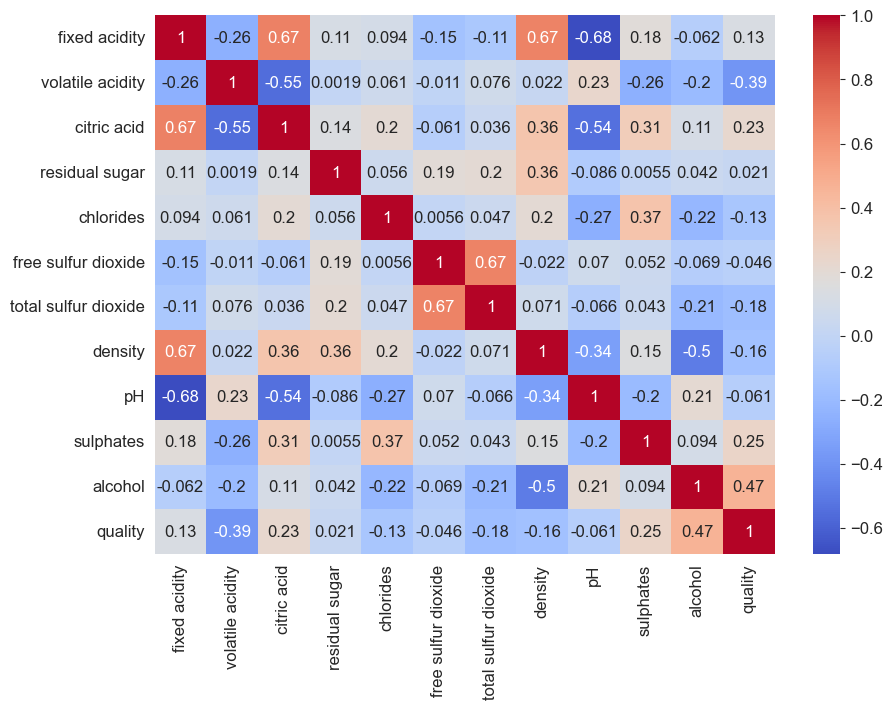

In [7]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# sns.heatmap(wine_data.corr(), annot=True, cmap='viridis')
# sns.heatmap(wine_data.corr(), annot=True, cmap='inferno')
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')

__Q1__: Does this reveal anything interesting for us? If so, what?

(After each question is a cell that we changed from 'Code' to 'Markdown'. Instead of reading Python code, Jupyter will read these as Markdown blocks, which is a way to code/format text. Here is a [Markdown Basic Guide](https://www.markdownguide.org/basic-syntax/))

- Yes, we can see a pretty strong `negative` correlation between the `fixed acidity` and the `pH`. As the pH increases, the fixed acidity decreases. However, it's completely opposite with citric acid since there's a pretty strong `positive` correlation between the `fixed acidity` and the `citric acid`. As the fixed acidity increases, the citric acid increases as well. From the heatmap, we can also see a `positive` correlation between the `wine quality` and the `citric acid`. As the `citric acid` increases, the wine `quality` increases. As the results, we might also say that as the `pH` decreases, the `quality` increases. However, the correlation between the `pH` and the `quality` is not strong enough to conclude that.

Using Seaborn regplots, plot *__each__* feature in the same style as the plot below. (Use a for loop. There should be 11 plots like the one below. Try experimenting with different colors, too!)

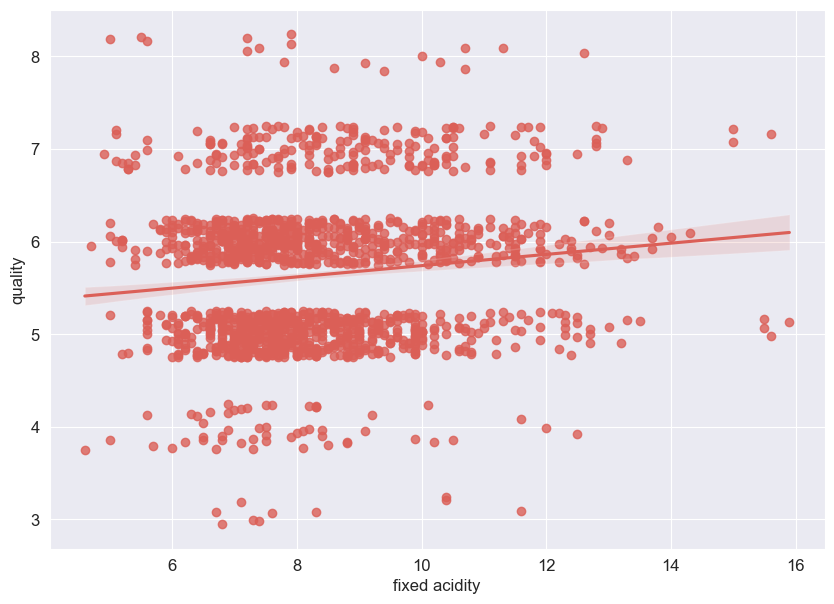

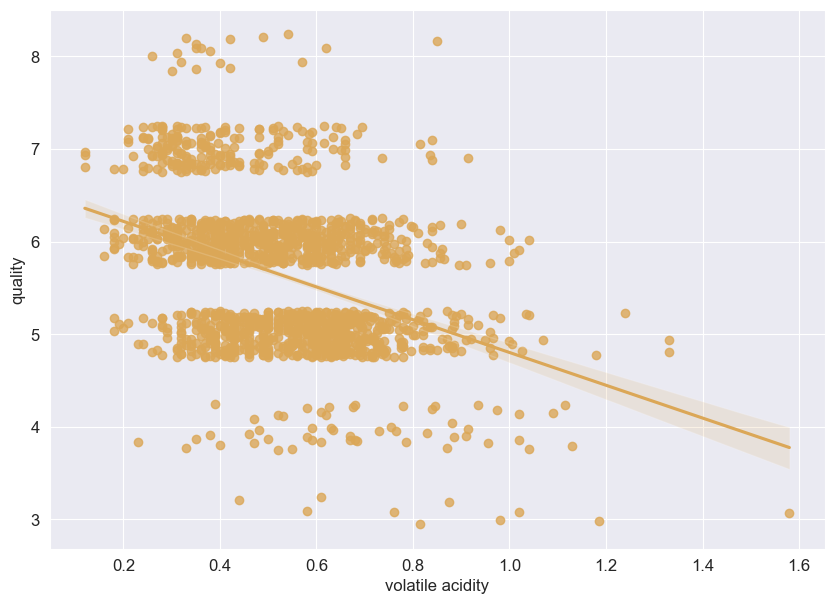

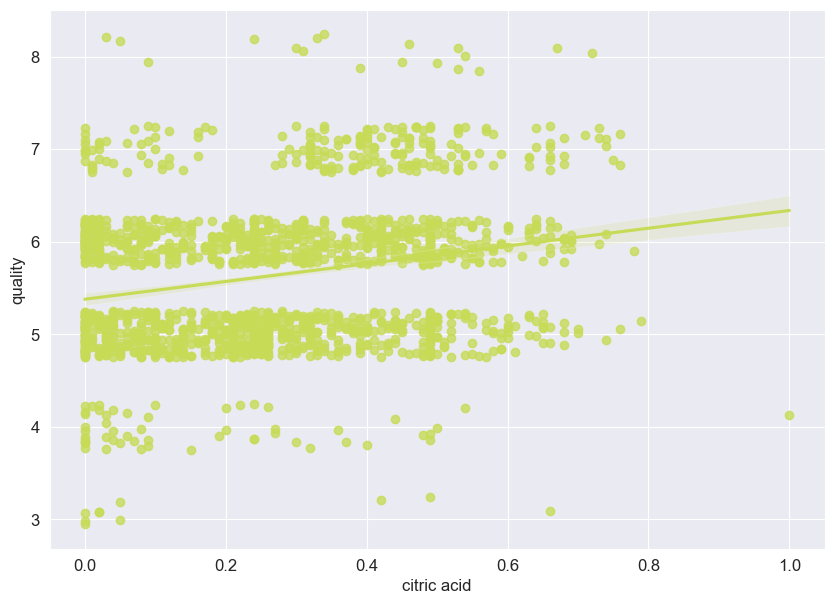

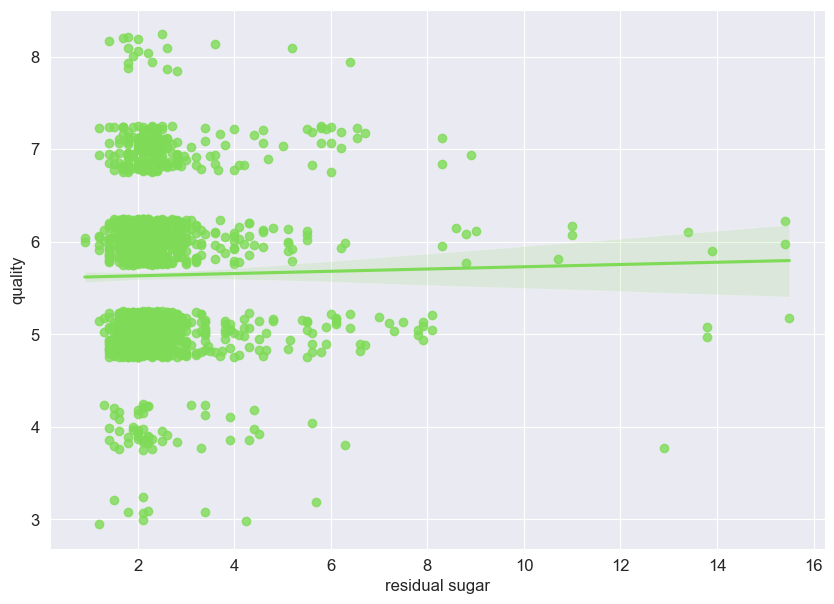

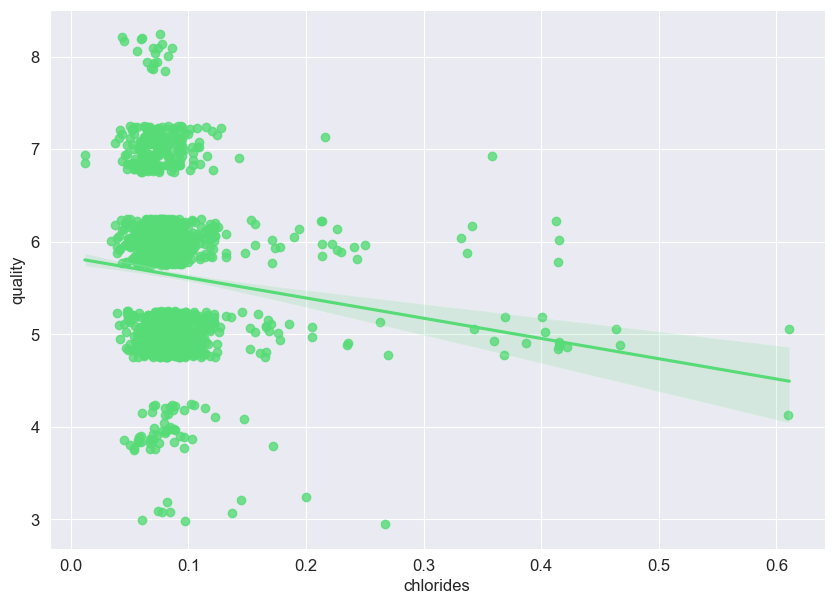

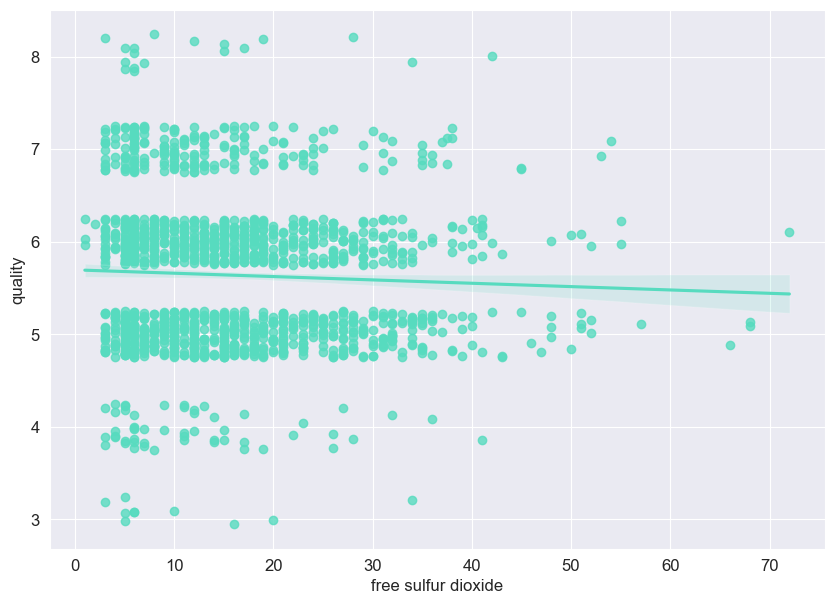

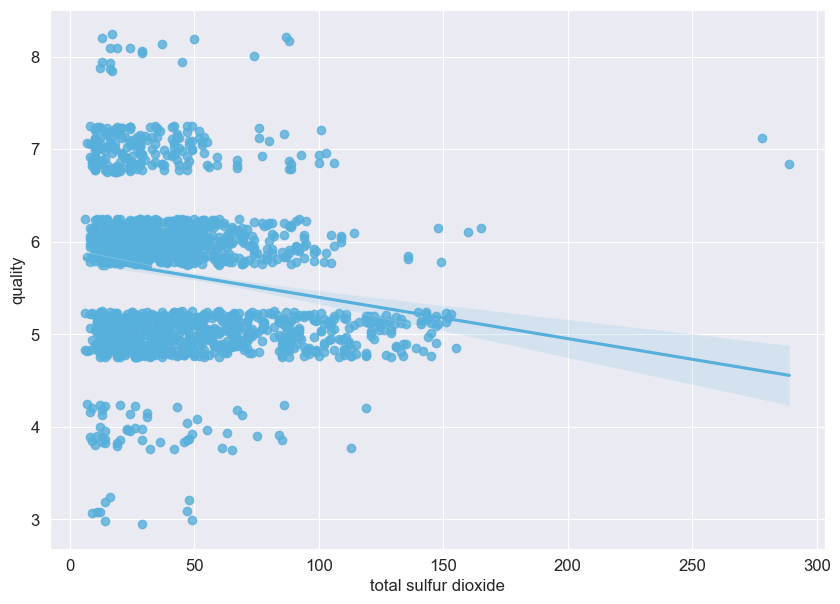

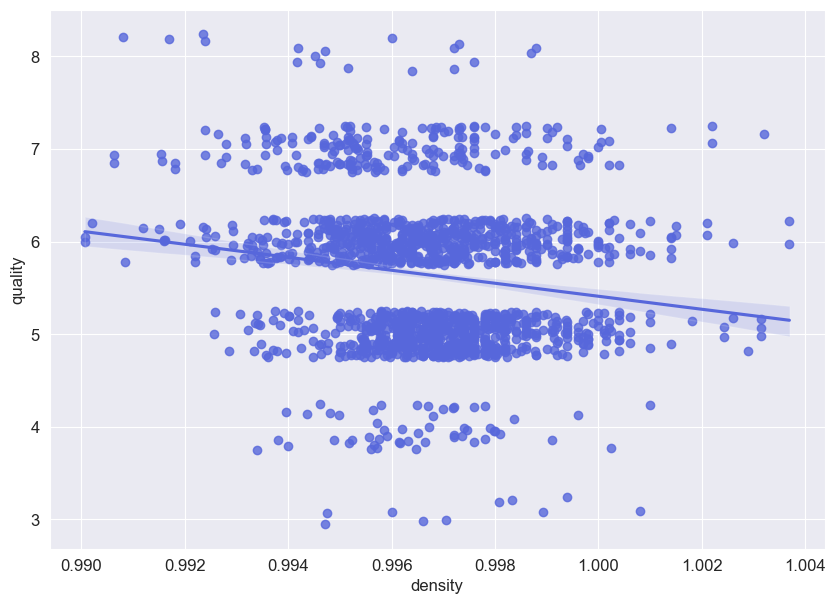

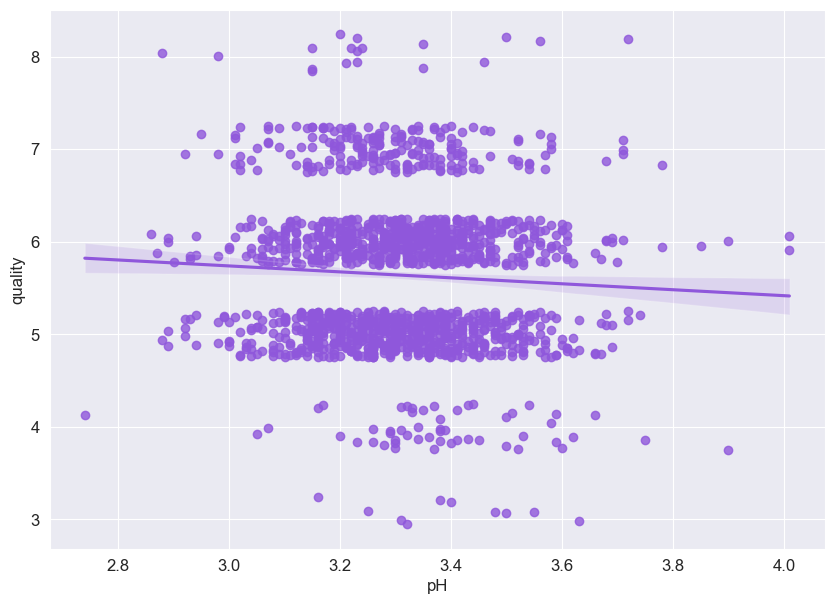

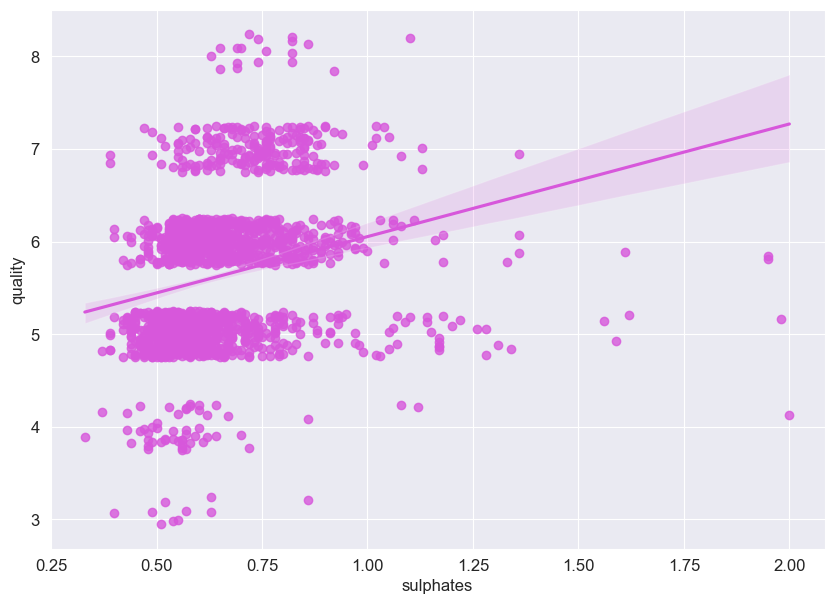

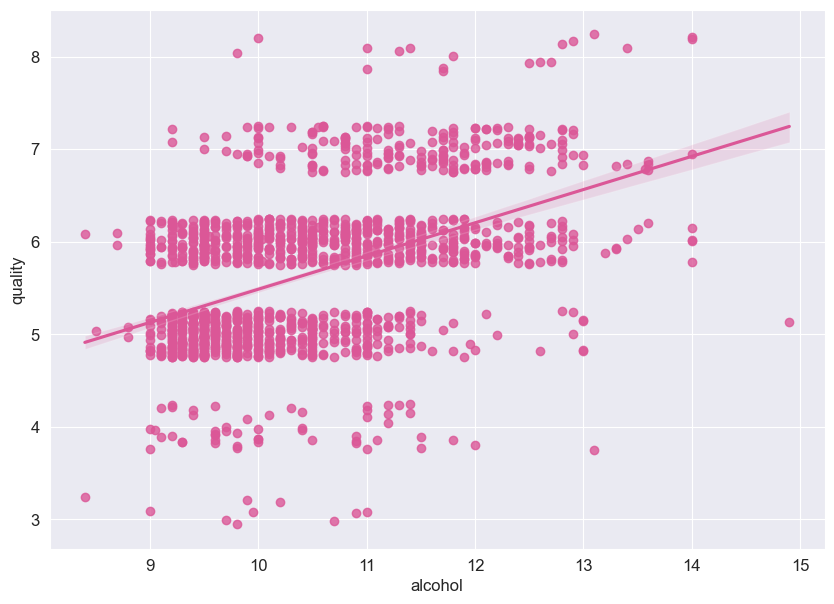

In [8]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# create a set of colors using color_palette function from Seaborn
palette = sns.color_palette("hls", 11)

columns_set = wine_data.columns

# exclude quality column (last column)
for i in range(len(columns_set) - 1):
    sns.regplot(x=columns_set[i], y=columns_set[len(columns_set)-1], data=wine_data, color=palette[i])
    plt.show()

__Q2__: Is there anything that sticks out? What features seem to have the strongest relationship with quality?


- There're a few features that have strong relationships with `quality`. However, we can say `alcohol` (__*positive relationship*__) and `volatile acidity` (__*negative relationship*__) have the strongest relationship with `quality`. The higher `alcohol` level, the higher `quality` of wine.

__Q3__: How do these findings compare with your conclusions gathered from the correlation matrix?

- They're pretty much similar. However, with these regplot, I can have a better idea of how each feature related to the quality of wine. For example, it makes more sense when I see the relationship between `alcohol` and `quality` (since according to the heatmap, the correlation between `alcohol` and `quality` is just __0.49__). I believe we should try a few different ways to see the relationship between attributes of data.

### __Part 3. Data Cleaning and Preparation for Analysis__

Use Pandas to find if there are any missing values in the data set

In [9]:
### PUT YOUR CODE HERE
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

__Q4:__ If there were missing values, how do you think you would deal with them in this data set?





- If so, I think we should remove the missing values if they don't really affect the target value (or have less impaction) or if the number of missing values is small and safe enough to be removed. Otherwise, we would replace the missing ones with mean data of the corresponding column.

__Q5:__ Are there any categorical features in the data set? If so, which ones are they?

(HINT: Remember, Categorical variables are those whose numbers are representations of a certain category. For example, if there is a "Gender" feature, we might change all "male" values to 1 and all "female" values to 2. In this sense, the numbers don't have any real meaning, but are a way we can turn non-numerical attributes into numbers that we can then use in our models.)

- None of the variables in the data set is categorical variable. If there is one categorical variable in this data set, it might be `density` since there're only 2 values `1` and `0.99` in this column.

Using Pandas replace, encode any categorical variables accordingly. 

In [10]:
### PUT YOUR CODE HERE
# We don't have any categorical variables in this data set.

In order to run the models, we will create a Pandas dataframe `X`, containing the independent variables, and an array of the dependent variable, `y`. But before we do that, we should scale our data. 

However, what's the best way to scale?

First, let's create an `X_unscaled` Pandas dataframe from our `wine_df` dataframe. Then, create a `y_unscaled` Pandas series of the dependent variable, 'quality'.

- We will extract the `not quality` columns from `wine_data`. The new data frame will be `X_unscaled`.
- The array of `quality` values will be Pandas series `y_unscaled`.

In [11]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# We will extract the `not quality` columns from `wine_data`. The new data frame will be `X_unscaled`.
# The array of `quality` values will be Pandas series `y_unscaled`.

X_unscaled = wine_data.drop('quality', axis=1)
y_unscaled = wine_data['quality']
# X_unscaled
# y_unscaled
print(f'X_unscaled columns: {X_unscaled.columns.to_list()}')

X_unscaled columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


Next, use Sci-Kit Learn's MinMaxScaler and StandardScaler (imported above) to create new sets of pandas dataframes from `X_unscaled`:
- `X_mm` (Using MinMaxScaler)
- `X_ss` (Using StandardScaler)

** The Scaler functions output 2D arrays, so you will need to turn them back into Pandas Dataframes, which can be passed directly to the Linear Regression function.

__Q6__: What statistical assumption does the Standard Scaler make about the data? Why might this be important?



- The `StandardScaler` makes the assumption that the data is normally distributed and scales the data so that it has a mean of 0 and a standard deviation of 1.
- This might be important because in the case when the independent variables are not normally distributed, this can have a negative impact on the performance of the model.

__Q7__: What do you think the effect will be on using Linear Regression on differently scaled (or unscaled) data?

- The effect of using Linear Regression on differently scaled data can be significant, as scaling can change the interpretation of the coefficients and impact the predictive performance of the model.

In [12]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
scaler_ss = StandardScaler()
X_ss = pd.DataFrame(scaler_ss.fit_transform(X_unscaled), columns=X_unscaled.columns)
X_ss.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [13]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
scaler_mm = MinMaxScaler()
X_mm = pd.DataFrame(scaler_mm.fit_transform(X_unscaled), columns=X_unscaled.columns)
X_mm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


Our final task before performing Linear Regression is to separate our data into training and testing sets. We have 3 different X dataframes, each with the same data but scaled differently:
- `X_unscaled`
- `X_ss`
- `X_mm`

Use Sci-Kit Learn's train_test_split function to create a training and testing set for each of the 3 data sets (Use `y_unscaled` for each of the data sets):
- `train_X_unscaled`, `train_y_unscaled`, `test_X_unscaled`, `test_y_unscaled`
- `train_X_ss`, `train_y_ss`, `test_X_ss`, `test_y_ss`
- `train_X_mm`, `train_y_mm`, `test_X_mm`, `test_y_mm`

Use a train/test split of 80/20

In [14]:
### PUT YOUR CODE HERE
# test_size=0.2 means 20% is testing data set and 80% is training data set
train_X_unscaled, test_X_unscaled, train_y_unscaled, test_y_unscaled = train_test_split(X_unscaled, y_unscaled, test_size=0.2)
train_X_ss, test_X_ss, train_y_ss, test_y_ss = train_test_split(X_ss, y_unscaled, test_size=0.2)
train_X_mm, test_X_mm, train_y_mm, test_y_mm = train_test_split(X_mm, y_unscaled, test_size=0.2)

### __Part 4: Model Creation and Evaluation__

Now, we have 3 sets of data sets, and we will use each of them to do Linear Regression modelling. For *__each__* of the 3 data sets, do the following (the output of using unscaled data is below):

1. Create a Sci-kit Learn Linear Regression model, and train (fit) it on the training data.
2. Use this model to predict quality values for the corresponding test_X values, and save these test predictions as `predictions`.
3. Use `predictions` and `test_y` values to calculate `residuals`
4. Create a Seaborn scatter plot of the true quality vs. the predicted quality of the test set.
5. Create a Seaborn histogram of the residuals.
6. Print the $R^{2}$ value using the test values.

- `Unscaled data`

In [15]:
# Import r2_score
from sklearn.metrics import r2_score

/Users/ndminh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


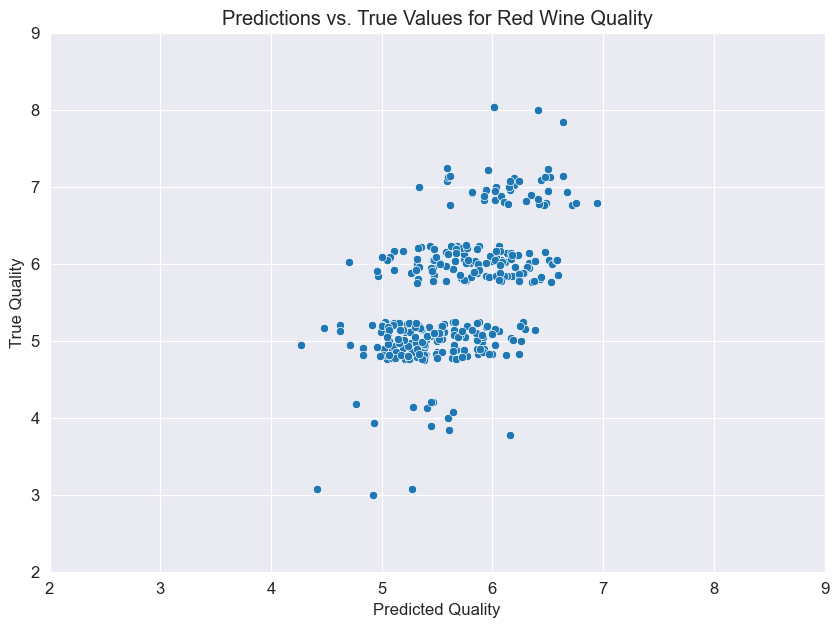

In [16]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT FOR UNSCALED DATA
# Create a Linear Regression model and fit it to the training data
model_unscaled = LinearRegression()
model_unscaled.fit(train_X_unscaled, train_y_unscaled)

# Predict quality values for the test data
predictions_unscaled = model_unscaled.predict(test_X_unscaled)

# Calculate the residuals
residuals_unscaled = test_y_unscaled - predictions_unscaled

# Create a scatter plot of true quality vs. predicted quality of the test set
sns.scatterplot(predictions_unscaled, test_y_unscaled)
plt.title('Predictions vs. True Values for Red Wine Quality')
plt.xlabel("Predicted Quality")
plt.ylabel("True Quality")
plt.xlim(2, 9)
plt.ylim(2, 9)
plt.show()

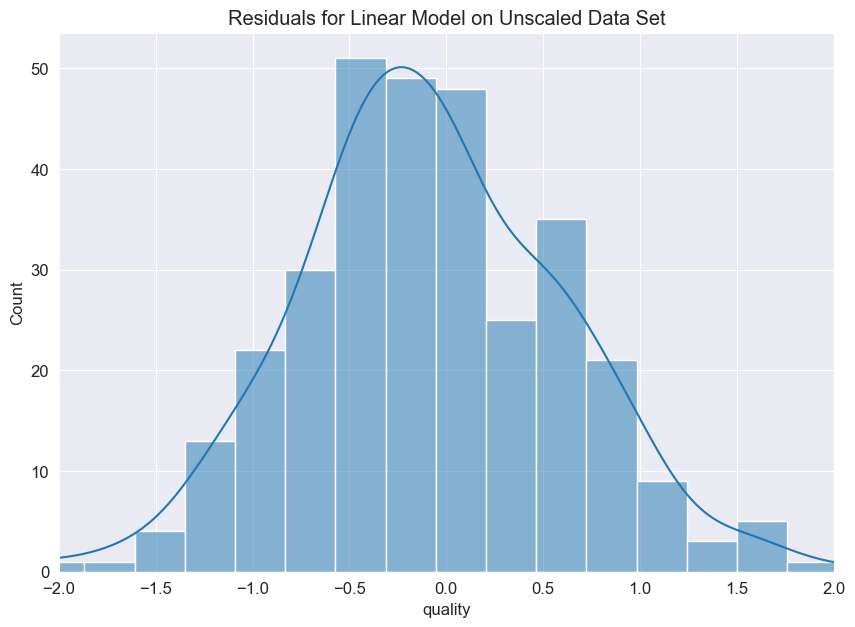

R-squared value:  0.28391364831493404


In [17]:
sns.histplot(residuals_unscaled, kde=True)
plt.title("Residuals for Linear Model on Unscaled Data Set")
plt.ylabel("Count")
plt.xlim(-2, 2)
plt.show()
# R2 values
r2_unscaled = r2_score(test_y_unscaled, predictions_unscaled)
print("R-squared value: ", r2_unscaled)

- `MM Scaled Data`

/Users/ndminh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


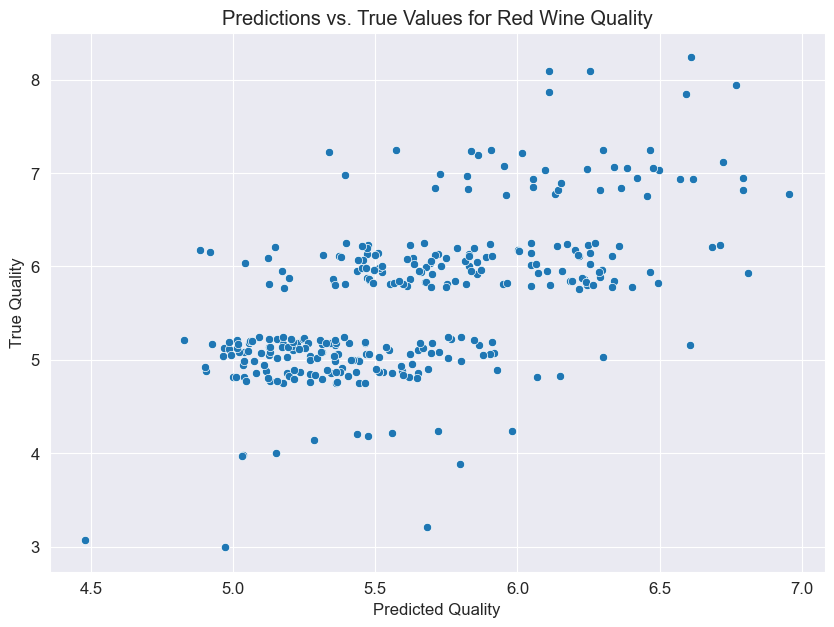

In [22]:
### PUT YOUR CODE HERE FOR MM SCALED DATA
# Create a Linear Regression model and fit it to the training data
mm_scaled = LinearRegression()
mm_scaled.fit(train_X_mm, train_y_mm)

# Predict quality values for the test data
predictions_mm = mm_scaled.predict(test_X_mm)

# Calculate the residuals
residuals_mm = test_y_mm - predictions_mm

# Create a scatter plot of true quality vs. predicted quality of the test set
sns.scatterplot(predictions_mm, test_y_mm)
plt.title('Predictions vs. True Values for Red Wine Quality')
plt.xlabel("Predicted Quality")
plt.ylabel("True Quality")
# plt.xlim(2, 9)
# plt.ylim(2, 9)
plt.show()

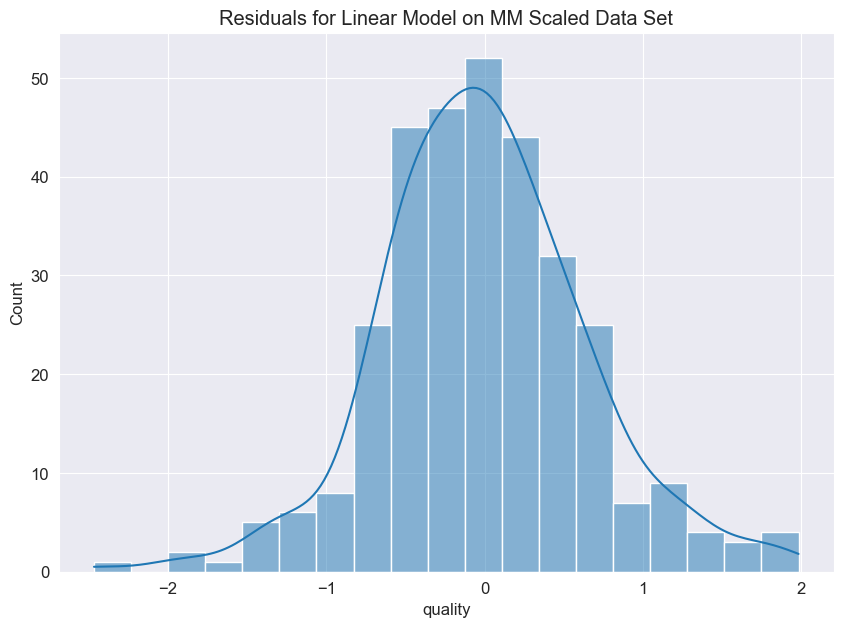

R-squared value:  0.37531181849090633


In [23]:
sns.histplot(residuals_mm, kde=True)
plt.title("Residuals for Linear Model on MM Scaled Data Set")
plt.ylabel("Count")
# plt.xlim(-2, 2)
plt.show()
# R2 values
r2_mm = r2_score(test_y_mm, predictions_mm)
print("R-squared value: ", r2_mm)

- `SS Scaled Data`

/Users/ndminh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


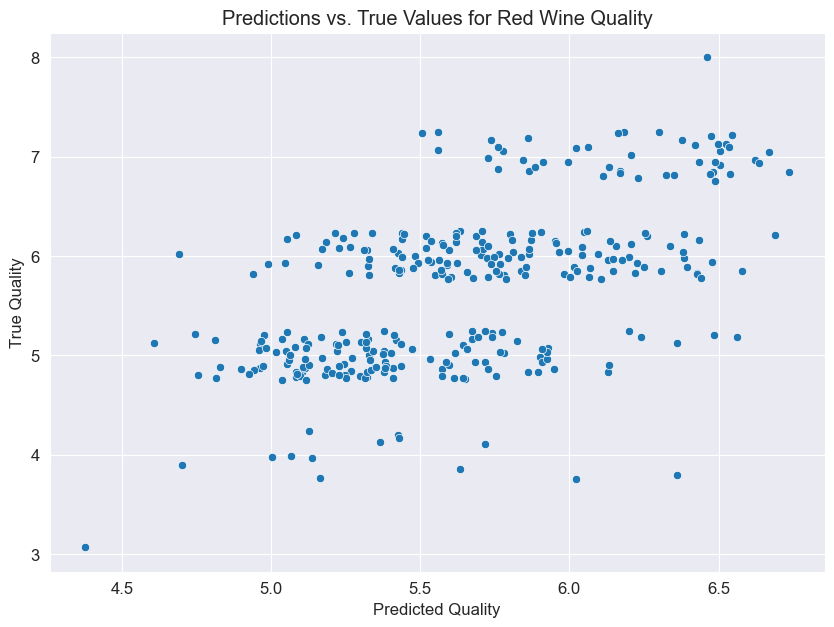

In [24]:
### PUT YOUR CODE HERE FOR SS SCALED DATA
# Create a Linear Regression model and fit it to the training data
ss_scaled = LinearRegression()
ss_scaled.fit(train_X_ss, train_y_ss)

# Predict quality values for the test data
predictions_ss = ss_scaled.predict(test_X_ss)

# Calculate the residuals
residuals_ss = test_y_ss - predictions_ss

# Create a scatter plot of true quality vs. predicted quality of the test set
sns.scatterplot(predictions_ss, test_y_ss)
plt.title('Predictions vs. True Values for Red Wine Quality')
plt.xlabel("Predicted Quality")
plt.ylabel("True Quality")
# plt.xlim(2, 9)
# plt.ylim(2, 9)
plt.show()

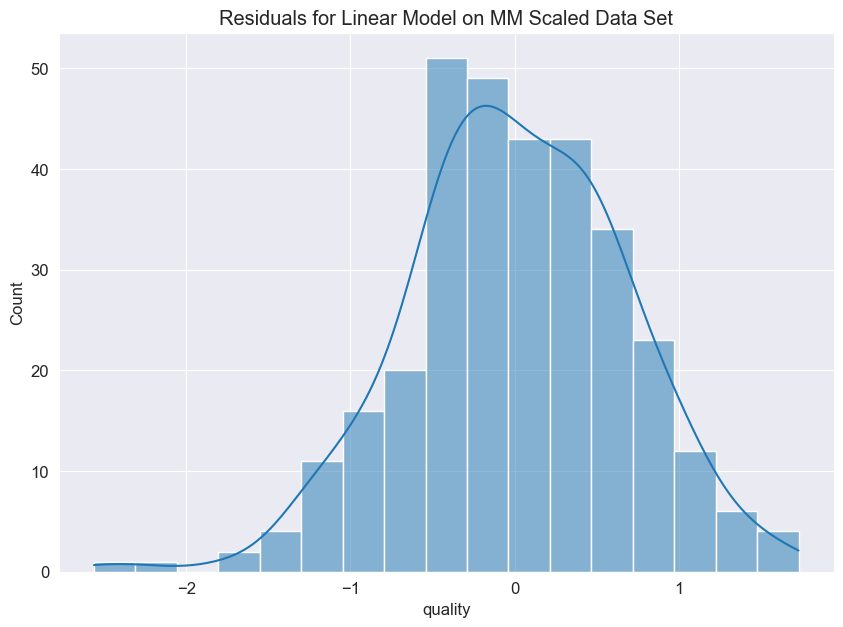

R-squared value:  0.33081355094859877


In [25]:
sns.histplot(residuals_ss, kde=True)
plt.title("Residuals for Linear Model on MM Scaled Data Set")
plt.ylabel("Count")
# plt.xlim(-2, 2)
plt.show()
# R2 values
r2_ss = r2_score(test_y_ss, predictions_ss)
print("R-squared value: ", r2_ss)

Finally, create a dataframe with all of the coefficients from each of the 3 models and compare.

In [32]:
### PUT YOUR CODE HERE TO TRY AND MIMIC THE BELOW OUTPUT
# Create a dictionary of coefficients for each models (add one feature column)
coefs = {
    'features': X_unscaled.columns,
    'Unscaled': model_unscaled.coef_,
    'StdScaler': ss_scaled.coef_,
    'MinMaxScaler': mm_scaled.coef_
}

# Create a dataframe from the coefficients dictionary
df_coefs = pd.DataFrame(data=coefs)

# Print the dataframe
df_coefs

,features,Unscaled,StdScaler,MinMaxScaler
0,fixed acidity,0.010794,0.034407,0.074409
1,volatile acidity,-1.039089,-0.192360,-1.390360
2,citric acid,-0.082286,-0.016478,-0.151190
3,residual sugar,0.025968,0.031712,0.091125
4,chlorides,-1.964770,-0.081534,-1.036069
5,free sulfur dioxide,0.003041,0.041312,0.300218
6,total sulfur dioxide,-0.003109,-0.113137,-0.973189
7,density,-16.428606,-0.050665,-0.044613
8,pH,-0.296373,-0.058318,-0.598384
9,sulphates,0.971346,0.155892,1.594857


__Q8__: As is often the case when working on real-world issues, the models may not necessarily fit perfectly. In these models, the $R^2$ values are relatively small. What does the $R^2$ value represent for our models?






- For our models, the $R^2$ values indicate the proportion of the variance in wine quality that can be explained by the independent variables in the model. As the $R^2$ values are relatively small, it is also possible that the relationship between the independent variables and wine quality is non-linear or complex, which can make it more difficult to model accurately using linear regression.

__Q9__: In your estimation, which model performed the best, and why?

- In my estimation, the MM model performed the best (with the $R^2$ score of approximately `0.3753`).

__Q10__: We saw that the use of differing standardizing techniques produced different results, with different coefficients and different $R^2$ values. Why do you think this is?


- The reason why different standardizing techniques produced different results is due to the different ways they scale the data. StandardScaler scales the data to have a mean of 0 and a standard deviation of 1. MinMaxScaler scales the data to a fixed range of 0 to 1. The unscaled data has no scaling applied to it. These different techniques can lead to differences in the distribution and range of the feature values, which will produce different results, with different coefficients and $R^2$ values.

__Report__


The most important part of any data science project is interpreting and communicating the results to the appropriate stakeholder, whether that be a boss, client, or another team member. Given all of the analysis you've done so far, write a short report (2 - 3 paragraphs) summarizing the analysis you did, the results, and the conclusions you came to, supporting your conclusions with your analysis. Feel free to do any more analysis you wish or to modify code you've already used. Curiosity is often rewarded!

In this project, we analyzed a wine quality dataset using linear regression models. We explored how different scaling techniques affect the accuracy of the models, and compared the coefficients and $R^2$ values of the models.

We found that the model trained on the MinMax scaled data performed the best, with an R^2 value of 0.3753. This model had the highest coefficients for most of the features, indicating that the different scaling technique can significantly impact the importance of each feature in the model. For example, the alcohol and sulphates features had higher coefficients for the MinMax scaled model than for the unscaled and standard scaled models.

In conclusion, the MinMax scaled model is the best model for predicting wine quality from this dataset. However, the relatively low $R^2$ value suggests that the model is not a great fit for the data, and more advanced modelling techniques may be required to achieve better results.